In [7]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ","MLPE"]
error = "bias"
p_train = 0.7
ps_test = [p_train, 0.5, 0.25]
dateexperiment = "2022_06_26_07_14"

mean_error_methods = {}

writer = pd.ExcelWriter('results/concept/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for i, p_test in enumerate(ps_test):
    for quant_name in quantificators:
        exp_id = "%s_%f" % (quant_name,p_test)
        results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
        results = results.loc[results['p_test'] == p_test]
        results['MAE'] = results['error'].abs()
        results_mean = results.groupby(['cut_point_train', 'cut_point_test'])['MAE'].mean().reset_index()
        #convert to matrix form
        results_mean = results_mean.pivot(index='cut_point_train', columns='cut_point_test', values='MAE')
        mean_error_methods[exp_id]=results_mean.mean().mean()
        print("Results for method %s. p_test: %f. Mean %s: %f" % (quant_name,p_test,error,mean_error_methods[exp_id]))
        cm = sns.light_palette('red', as_cmap=True)
        display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))
        results_mean.to_excel(writer, sheet_name=exp_id)
        workbook = writer.book
        worksheet = writer.sheets[exp_id]
        # Apply a conditional format to the cell range.
        worksheet.conditional_format('B2:D4', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.close()

Results for method CC. p_test: 0.700000. Mean bias: 0.046865


cut_point_test,2,3,4
cut_point_train,,,
2,0.018184,0.029576,0.080932
3,0.055316,0.023080,0.035996
4,0.099748,0.060236,0.018716


Results for method ACC. p_test: 0.700000. Mean bias: 0.067275


cut_point_test,2,3,4
cut_point_train,,,
2,0.016547,0.060741,0.135912
3,0.058580,0.017520,0.071544
4,0.143486,0.083772,0.017375


Results for method PCC. p_test: 0.700000. Mean bias: 0.039683


cut_point_test,2,3,4
cut_point_train,,,
2,0.012631,0.034358,0.072411
3,0.042270,0.012601,0.038202
4,0.083287,0.048434,0.012956


Results for method PACC. p_test: 0.700000. Mean bias: 0.071047


cut_point_test,2,3,4
cut_point_train,,,
2,0.015833,0.072949,0.150754
3,0.062840,0.015312,0.077289
4,0.145658,0.081411,0.017381


Results for method HDy. p_test: 0.700000. Mean bias: 0.076794


cut_point_test,2,3,4
cut_point_train,,,
2,0.025547,0.084303,0.166424
3,0.055935,0.021123,0.089980
4,0.141152,0.083782,0.022901


Results for method EMQ. p_test: 0.700000. Mean bias: 0.070401


cut_point_test,2,3,4
cut_point_train,,,
2,0.014771,0.072974,0.148349
3,0.060209,0.014758,0.080310
4,0.145546,0.081050,0.015641


Results for method MLPE. p_test: 0.700000. Mean bias: 0.000000


cut_point_test,2,3,4
cut_point_train,,,
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000


Results for method CC. p_test: 0.500000. Mean bias: 0.068596


cut_point_test,2,3,4
cut_point_train,,,
2,0.046696,0.101444,0.180368
3,0.017688,0.044864,0.114788
4,0.026980,0.023096,0.061440


Results for method ACC. p_test: 0.500000. Mean bias: 0.077241


cut_point_test,2,3,4
cut_point_train,,,
2,0.020222,0.073352,0.190370
3,0.061607,0.020046,0.096927
4,0.127483,0.085548,0.019611


Results for method PCC. p_test: 0.500000. Mean bias: 0.088386


cut_point_test,2,3,4
cut_point_train,,,
2,0.090596,0.134862,0.194583
3,0.036420,0.070401,0.132470
4,0.015377,0.036033,0.084728


Results for method PACC. p_test: 0.500000. Mean bias: 0.081386


cut_point_test,2,3,4
cut_point_train,,,
2,0.017303,0.078882,0.195373
3,0.071929,0.020291,0.096252
4,0.140935,0.094431,0.017078


Results for method HDy. p_test: 0.500000. Mean bias: 0.080795


cut_point_test,2,3,4
cut_point_train,,,
2,0.026364,0.095596,0.213859
3,0.047737,0.023697,0.106020
4,0.112242,0.075859,0.025778


Results for method EMQ. p_test: 0.500000. Mean bias: 0.077917


cut_point_test,2,3,4
cut_point_train,,,
2,0.015381,0.078583,0.198942
3,0.061208,0.017502,0.097949
4,0.130086,0.085904,0.015696


Results for method MLPE. p_test: 0.500000. Mean bias: 0.200000


cut_point_test,2,3,4
cut_point_train,,,
2,0.200000,0.200000,0.200000
3,0.200000,0.200000,0.200000
4,0.200000,0.200000,0.200000


Results for method CC. p_test: 0.250000. Mean bias: 0.149063


cut_point_test,2,3,4
cut_point_train,,,
2,0.119276,0.194116,0.302172
3,0.083724,0.123236,0.210016
4,0.072252,0.091692,0.145080


Results for method ACC. p_test: 0.250000. Mean bias: 0.090345


cut_point_test,2,3,4
cut_point_train,,,
2,0.027291,0.092373,0.254271
3,0.069192,0.021801,0.124824
4,0.112044,0.085739,0.025570


Results for method PCC. p_test: 0.250000. Mean bias: 0.202652


cut_point_test,2,3,4
cut_point_train,,,
2,0.203270,0.263416,0.345645
3,0.132629,0.169912,0.248639
4,0.124221,0.143645,0.192492


Results for method PACC. p_test: 0.250000. Mean bias: 0.096276


cut_point_test,2,3,4
cut_point_train,,,
2,0.027297,0.088694,0.248125
3,0.087113,0.025991,0.116615
4,0.140962,0.106831,0.024860


Results for method HDy. p_test: 0.250000. Mean bias: 0.078925


cut_point_test,2,3,4
cut_point_train,,,
2,0.020394,0.101414,0.253475
3,0.037697,0.026222,0.113414
4,0.073404,0.060152,0.024152


Results for method EMQ. p_test: 0.250000. Mean bias: 0.075461


cut_point_test,2,3,4
cut_point_train,,,
2,0.019585,0.068129,0.232506
3,0.055210,0.019532,0.097669
4,0.096599,0.074025,0.015896


Results for method MLPE. p_test: 0.250000. Mean bias: 0.450000


cut_point_test,2,3,4
cut_point_train,,,
2,0.450000,0.450000,0.450000
3,0.450000,0.450000,0.450000
4,0.450000,0.450000,0.450000


Text(0.5, 0.38, 'p_train = 0.700000, p_test = 0.250000')

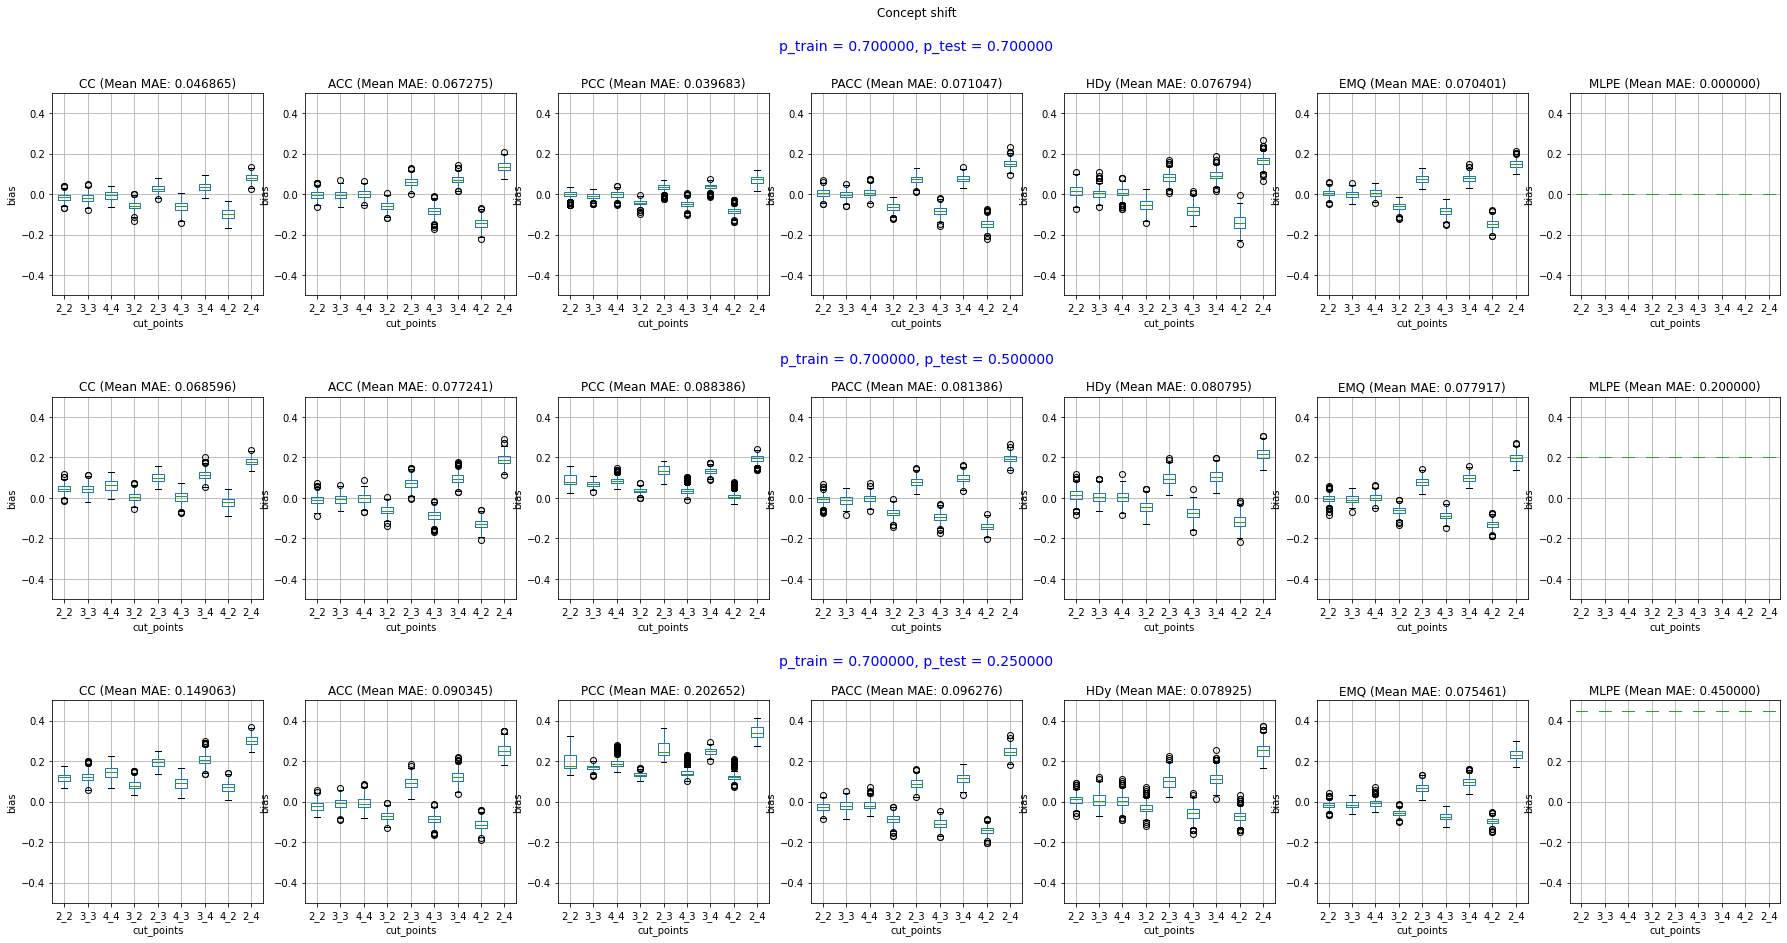

In [8]:
order = ("2_2","3_3","4_4","3_2","2_3","4_3","3_4","4_2","2_4")

fig, ax = plt.subplots(len(ps_test),len(quantificators),figsize=(30,15))
plt.subplots_adjust(hspace=0.5)
for i, p_test in enumerate(ps_test):
    for k,quant_name in enumerate(quantificators):
        exp_id = "%s_%f" % (quant_name,p_test)
        results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
        results = results.loc[results['p_test'] == p_test]
        results['cut_points'] = results['cut_point_train'].astype(str)+'_'+results['cut_point_test'].astype(str)
        results.cut_points = results.cut_points.astype("category")
        results['cut_points'] = results.cut_points.cat.set_categories(order)
        results = results.sort_values(["cut_points"])
        ax[i][k].set_ylim(-0.5, 0.5)
        ax[i][k].set_ylabel(error)
        results.boxplot(ax=ax[i][k],column='error',by='cut_points')
        plt.suptitle('Concept shift')
        ax[i][k].set_title("%s (Mean %s: %f)"  % (quant_name,'MAE',mean_error_methods[exp_id]))

#Done by hand but I did not find an easy way
plt.figtext(0.5,0.95, "p_train = %f, p_test = %f" % (p_train,ps_test[0]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.66, "p_train = %f, p_test = %f" % (p_train,ps_test[1]), ha="center", va="top", fontsize=14, color="b")
plt.figtext(0.5,0.38, "p_train = %f, p_test = %f" % (p_train,ps_test[2]), ha="center", va="top", fontsize=14, color="b")